**ANÁLISIS DE DATOS - GRUPO E**

UNIVERSIDAD DE LA PAMPA

UNIVERSIDAD ABIERTA INTERAMERICANA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from PIL import Image
import requests

- La notebook debe analizar cada universidad del grupo
- Trabajar creando gráficos que expliquen las siguientes dimensiones:
  * Carrera
  * Edad
  * Género
  * Localidad
- Realizar un comparativo de inscripciones entre ambas universidades.
- Analizar correlaciones de variables, entre:
  * Carrera
  * Edad
  * Género
  * Localidad
- Presentar una conclusión final de lo analizado.

In [ ]:
url_lp = 'https://drive.google.com/uc?export=download&id=12cT0BculEBntzcsqWf48ii3_i1yjnOKw'
url_in = 'https://drive.google.com/uc?export=download&id=1cMmAtYczrEJKtq9lBnCQlGtcICr5luhg'

df_lp = pd.read_csv(url_lp, sep='\t')
df_in = pd.read_csv(url_in, sep='\t')

In [ ]:
df_total = pd.concat([df_lp, df_in])

PARTE 1:

Trabajar creando gráficos que expliquen las siguientes dimensiones:

Carrera

Edad

Género

Localidad

Se realiza un análisis por edad

Text(0.5, 1.0, 'Distribución por edades en la carrera\nuniversidad nacional de la pampa')

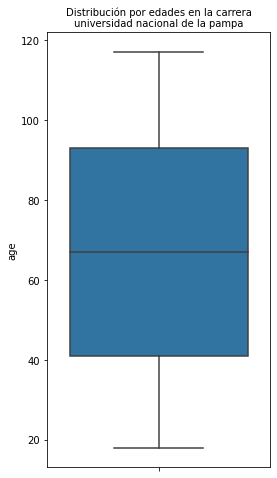

In [ ]:
plt.figure(figsize=(4,8))
sns.boxplot(data=df_lp, y="age")
plt.title('Distribución por edades en la carrera\n'+str(df_lp.university[0]), fontsize=10)

Text(0.5, 1.0, 'Distribución por edades en la carrera\nuniversidad abierta interamericana')

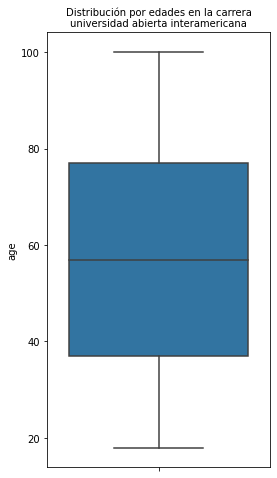

In [ ]:
plt.figure(figsize=(4,8))
sns.boxplot(data=df_in, y="age")
plt.title('Distribución por edades en la carrera\n'+str(df_in.university[0]), fontsize=10)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


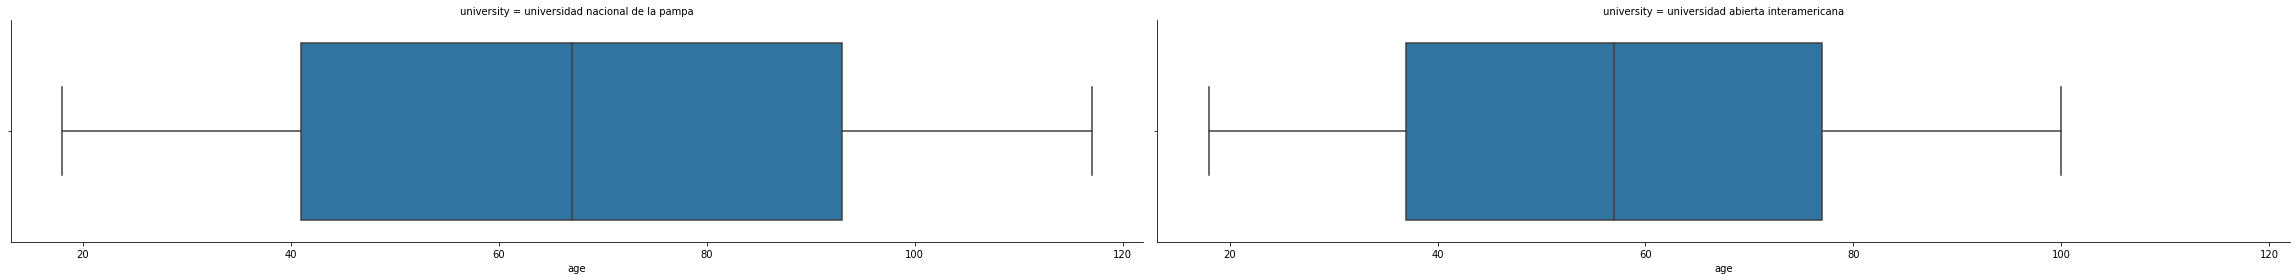

In [ ]:
g = sns.FacetGrid(df_total, col="university", height=4, aspect=4)
g.map(sns.boxplot, "age")
#g.figure.subplots_adjust(wspace=.02, hspace=.1)

Analizando los boxplots por edad y por universidad, si bien se ve que no hay outliers, la mediana de edad es muy alta considerando que solo se consideran alumnos que se inscribieron desde septiembre de 2020 y febrero de 2021.
Dado que no es posible hacer ingenería de variables por desconocimiento de dominio acerca de la muestra, y dado que la mediana de la edad es muy alta (por lo que no se puede simplemente quitar estos registros dado que nos quedaríamos con muy pocos datos), no se podrán realizar conclusiones acerca del dato de la edad.

Se realiza análisis por carrera y género

In [38]:
# ordeno los df
stats_lp = df_lp
stats_lp['cont_carrera'] = stats_lp.groupby('career', sort=False)['career'].transform('count')
stats_lp = stats_lp.sort_values('cont_carrera', ascending=False)

stats_in = df_in
stats_in['cont_carrera'] = stats_in.groupby('career', sort=False)['career'].transform('count')
stats_in = stats_lp.sort_values('cont_carrera', ascending=False)

Text(0.5, 1.0, 'Numero de estudiantes por carrera y género\nuniversidad nacional de la pampa')

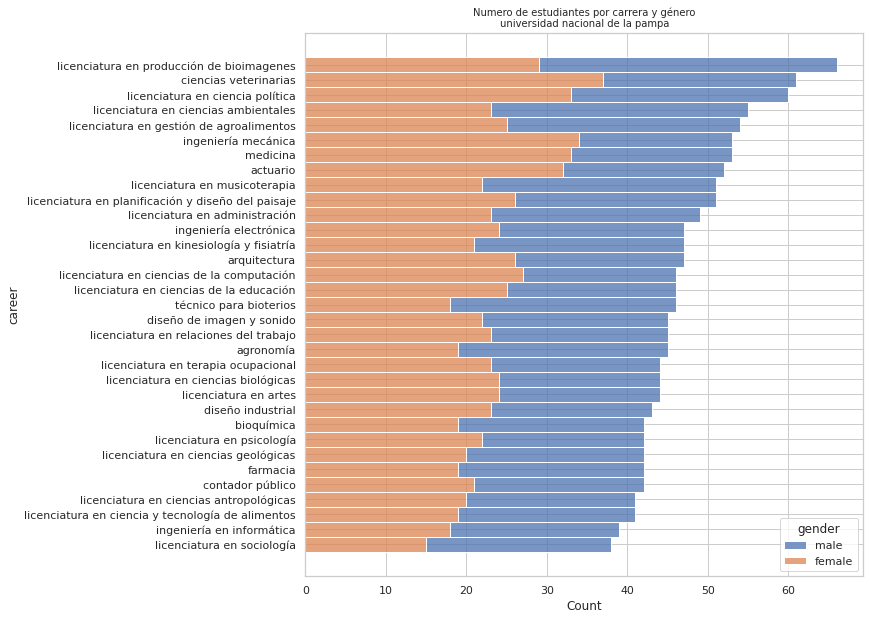

In [39]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
p1_lp = sns.histplot(data=stats_lp, y="career", hue="gender", multiple="stack")
p1_lp.set_title('Numero de estudiantes por carrera y género\n'+df_lp['university'][0], fontsize=10)

Text(0.5, 1.0, 'Numero de estudiantes por carrera y género\nuniversidad abierta interamericana')

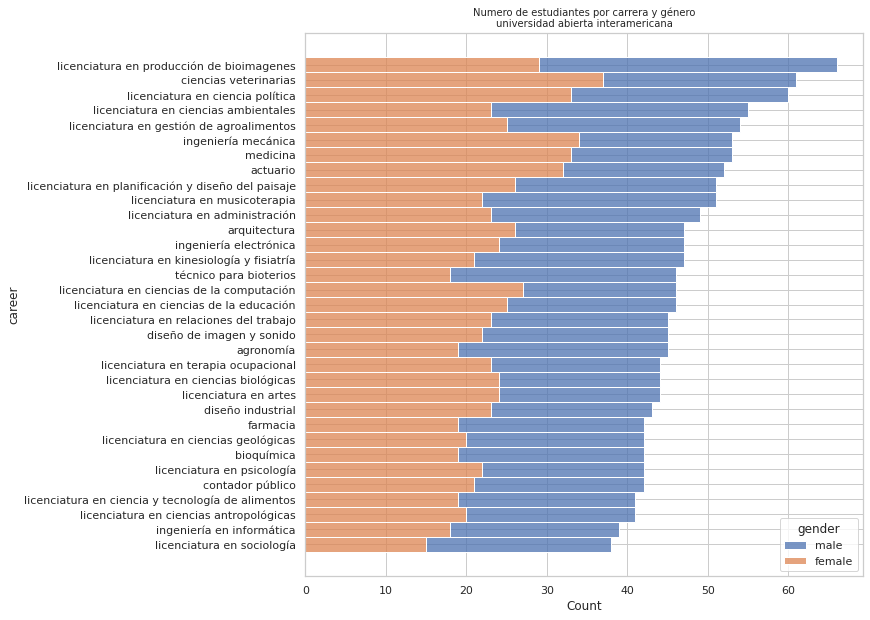

In [41]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
p1_in = sns.histplot(data=stats_in, y="career", hue="gender", multiple="stack")
p1_in.set_title('Numero de estudiantes por carrera y género\n'+df_in['university'][0], fontsize=10)

Text(0.5, 1.0, 'Numero de estudiantes por carrera y universidad')

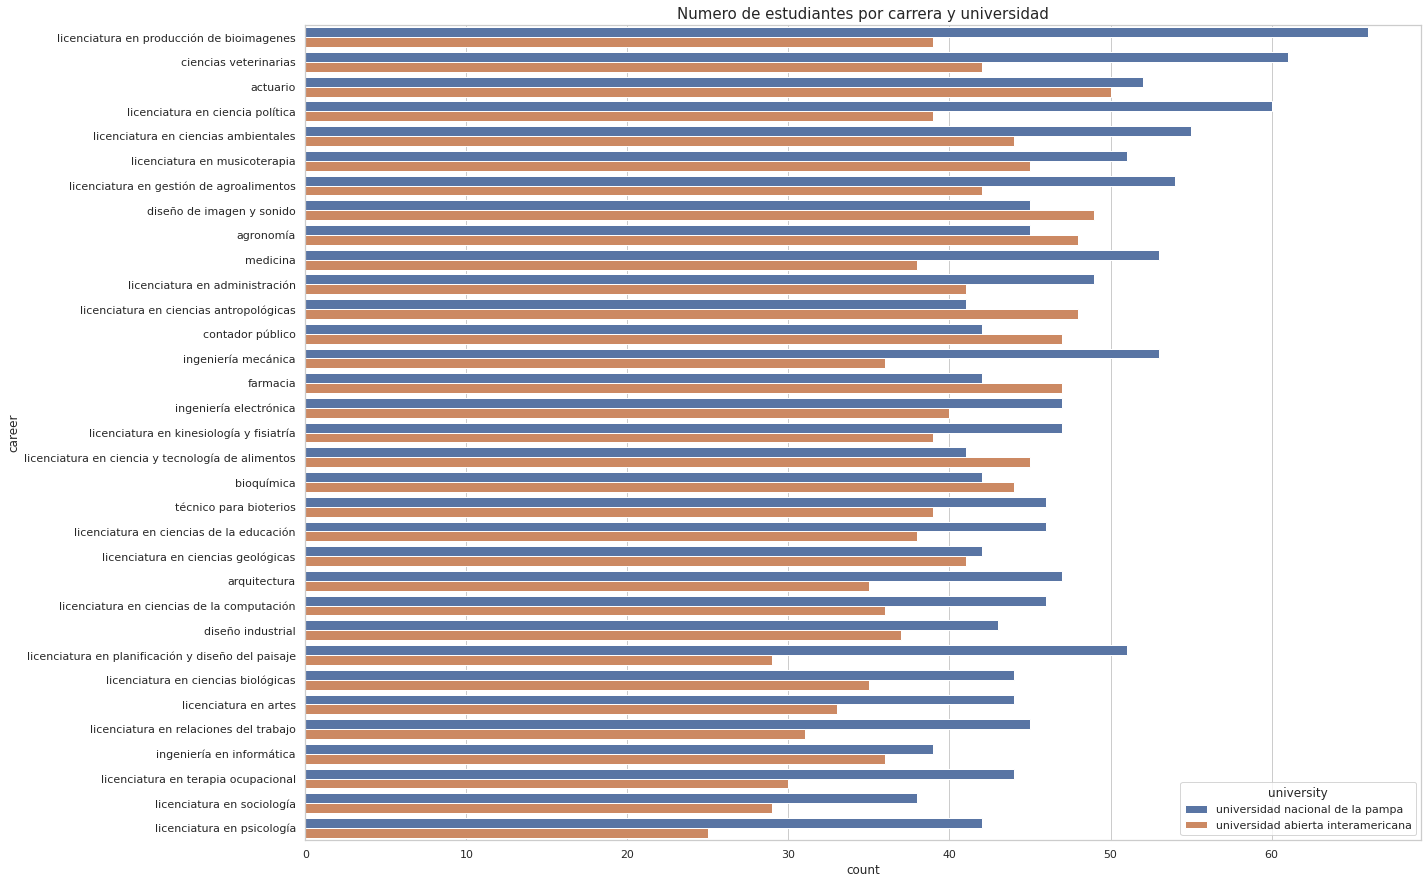

In [100]:
plt.figure(figsize=(20,15))
p2_lp = sns.countplot(data=df_total, y="career", hue="university", order = df_total.career.value_counts().index)
p2_lp.set_title('Numero de estudiantes por carrera y universidad', fontsize=15)

Análisis por género

Text(0.5, 1.0, 'Distribución de estudiantes por género\nuniversidad nacional de la pampa')

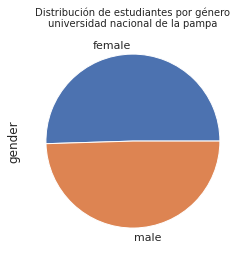

In [63]:
df_lp.gender.value_counts().plot(kind='pie')
plt.title('Distribución de estudiantes por género\n'+df_lp['university'][0], fontsize=10)

Text(0.5, 1.0, 'Distribución de estudiantes por género\nuniversidad abierta interamericana')

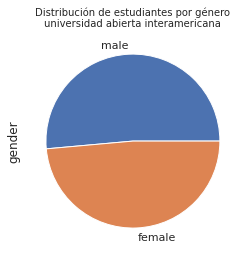

In [64]:
df_in.gender.value_counts().plot(kind='pie')
plt.title('Distribución de estudiantes por género\n'+df_in['university'][0], fontsize=10)

Análisis por localidad

In [92]:
stats = df_total
stats['cont_loc'] = stats.groupby('location', sort=False)['location'].transform('count')
# me quedo con las localidades que tienen como minimo 4 alumnos porque son muchas localidades
stats = stats[(stats['cont_loc'] >= 4)]

Text(0.5, 1.0, 'Numero de estudiantes por localidad y universidad')

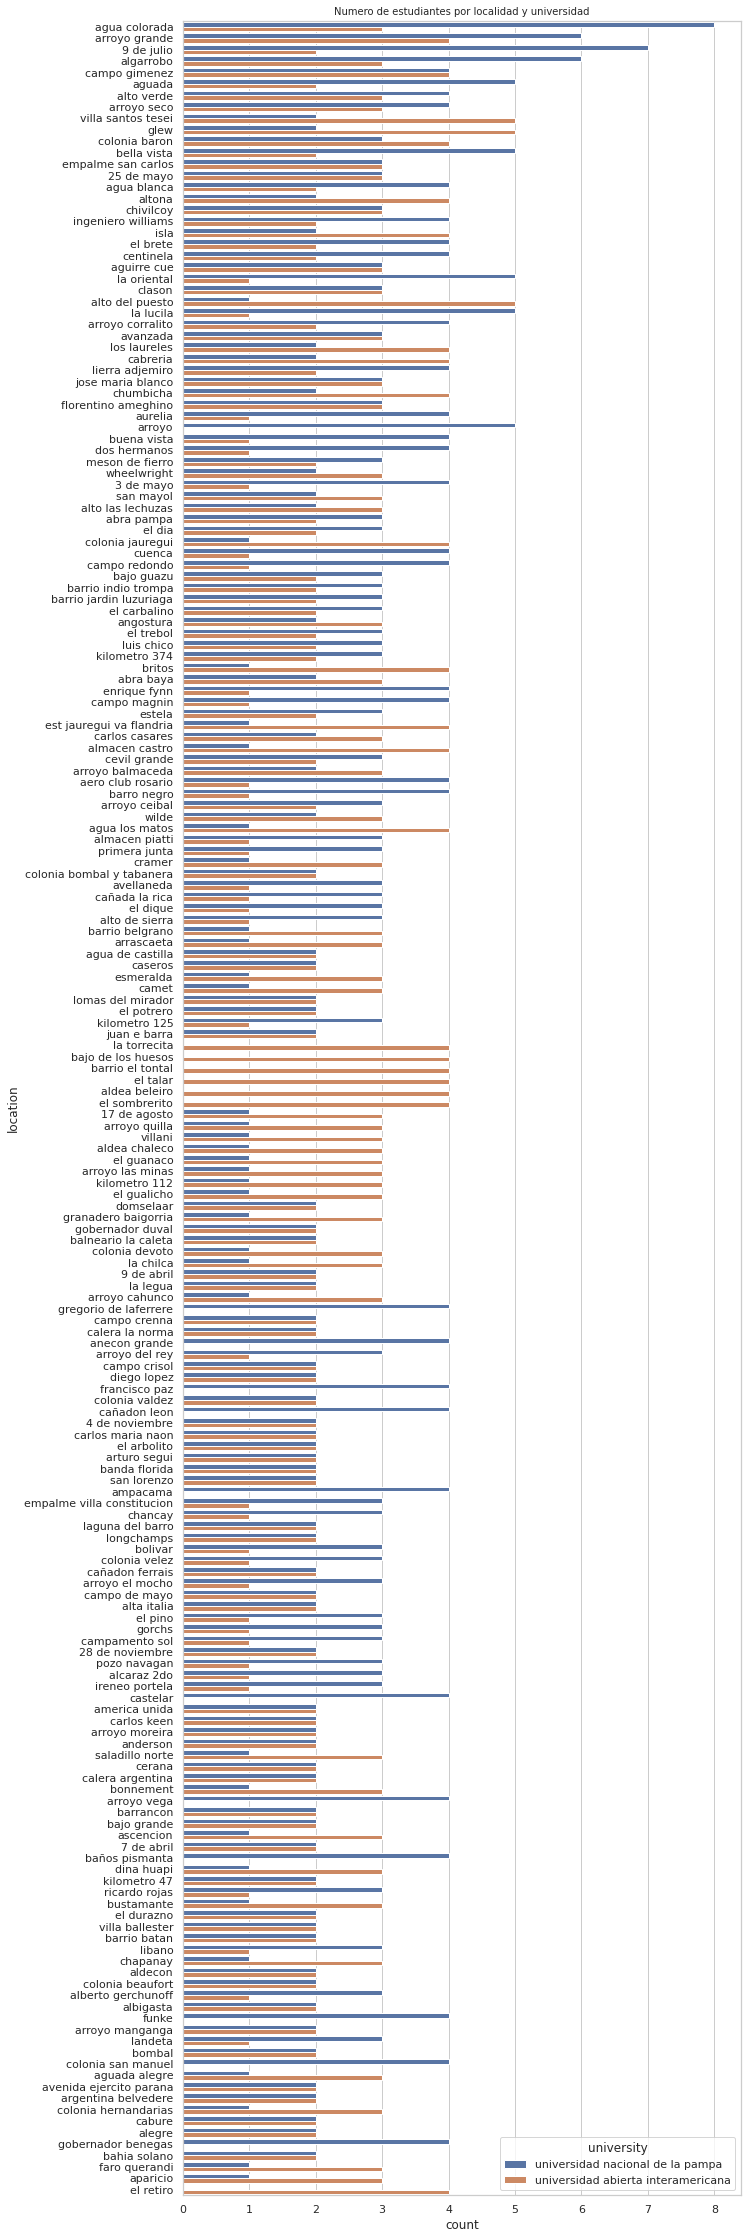

In [94]:
plt.figure(figsize=(10,40))
p2_lp = sns.countplot(data=stats, y="location", hue="university", order = stats.location.value_counts().index)
p2_lp.set_title('Numero de estudiantes por localidad y universidad', fontsize=10)

PARTE 2

Realizar un comparativo de inscripciones entre ambas universidades.

Text(0.5, 1.0, 'Numero de inscripciones por mes y universidad')

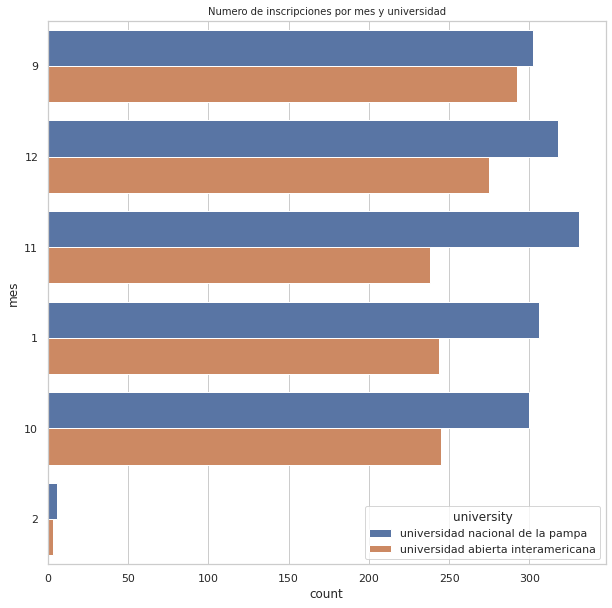

In [96]:
plt.figure(figsize=(10,10))
stats = df_total
stats['inscription_date'] = pd.to_datetime(stats['inscription_date'])
stats['mes'] = stats['inscription_date'].dt.month
#stats_6['cont_year'] = stats_6.groupby('year', sort=False)['year'].transform('count')
#stats_6 = stats_6.sort_values('cont_year', ascending=False)
sns.countplot(data=stats, y="mes", hue="university", order = stats.mes.value_counts().index)
plt.title('Numero de inscripciones por mes y universidad', fontsize=10)

PARTE 5

Analizar correlaciones de variables, entre:

Carrera

Edad

Género

Localidad

In [97]:
# hago mapa de calor de todo el dataset
# me quedo solo con las columnas de interes
stats = pd.DataFrame(df_total, columns=['career', 'age', 'gender', 'location', 'university'])
# paso las variables a categoricas
stats['career']=stats['career'].astype('category').cat.codes
stats['gender']=stats['gender'].astype('category').cat.codes
stats['location']=stats['location'].astype('category').cat.codes
stats['university']=stats['university'].astype('category').cat.codes

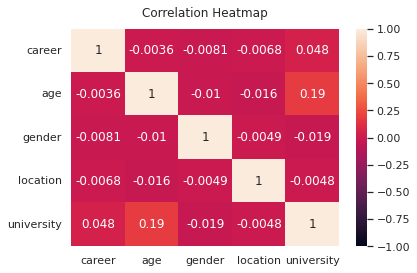

In [99]:
sns.heatmap(stats.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**CONCLUSIONES**

En lo que respecta a la distribución de carreras entre las universidades de La Pampa y La Universidad Abierta Interamericana, existe bastante diferencia entre ambas universidades.
La carrera con mayor participación en la Universidad de La Pampa es la Licenciatura en Producción de Bioimágenes (que ocupa el lugar 18 en la Universidad Interamericana). Mientras que la de mayor participación en la Interamericana es Actuario (que ocupa el octavo lugar en La Pampa).

Respecto a la distribución por género, en ambas universidades se puede decir aproximadamente que la participación por género es muy similiar entre las carreras y las universidades. Sindo la Universidad de La Pampa la que tiene una leve mayoría de mujeres, mientras que en la Universidad Abierta Interamericana es al revés.

En cuanto a distribución por edad, tal como se vio, no se puede sacar ninguna conclusión debido a la poca fiabilidad que tiene este dato en los regigtros.

Si analizamos el número de estudiantes por localidad y por universidad, vemos que este número es muy bajo para todos los casos, siendo el más alto de 8 estudiantes para la universidad de la Pampa y 5 para Interamericanaambas universidades. Las localidades con más cantidad de estudiantes en Universidad de La Pampa son: Agua Colorada, 9 de Julio, Arroyo Grande y Algarrobo. Mientras que en la Interamericana, el máximo de 5 alumnos se da en las localidades de Villa Santos Tesei, Alto del Puesto y Glew. Se concluye que hay una tendencia a darse una mayor concentración en las localidades más cercanas a las universidades, aunque no es condición necesaria y suficiente, dado que en la mayoría de las localidades analizadas (con más de 3 estudiantes), existen alumnos de ambas universidades.

En cuanto a la distribución entre las universidades por fecha de inscripción, se nota un mayor número de inscripciones en la Universidad de La Pampa, siendo la distribución entre los meses bastante uniforme. Hay que tener en cuenta quee en el filtrado de datos desde la base de datos postgres, para 2020 se consideran solamente los meses de septiembre, octubre, noviembre y diciembre. Mientras que para el 2021 solamente se consdiera los datos del mes de enero y solamente un mes de febrero (lo que se refleja por la baja cantidad de reistros en este mes).

Finalmente si analizamos el mapa de calor entre ciertas variables, vemos que existe una importante correlación entre universidad y la edad, lo que ya se sugería en el análisis de los boxplot de distribución de edad. Esto se puede deber a las fechas de fundacíón: La Pampa en 1958, y la Interamericana en 1995, ya que en el dataset no se filtró por edad máxima, y por tanto se tiene el registro histórico de alumnos. Aunque como se vio, estos datos no son coherentes con respecto a las fechas de inscripción de 2020 y 2021.
Otro aspecto que puede desprenderse del mapa de calor, es la correlación entre la distribución de las carreras por universidad, tal como se había comentado antes. Sin embargo, no se pudo identificar ningún patrón en las carreras (por ejemplo las de perfil científico y las de perfil administrativo) entre ambas universidades.
Finalmente del mapa de calor, a diferencia de lo que se esperaba, se puede ver una baja correlación entre localidad y universidad, aunque como se vio, es arriesgado tomar una conclusión respecto a este punto, dado los pocos datos con que se cuenta.